In [1]:
# import relevant libraries to work in

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# read in CSV file
df = pd.read_csv("/Users/tinashem/Documents/Datasets/Local_Area_Unemployment_Statistics__LAUS_.csv")

In [3]:
# check how many rows and columns are in the dataset
df.shape

(200631, 11)

In [4]:
# first glance of CSV file
df.head()

,Area Type,Area Name,Date,Year,Month,Seasonally Adjusted (Y/N),Status (Preliminary / Final),Labor Force,Employment,Unemployment,Unemployment Rate
0,State,California,01/01/1976,1976,January,N,Final,9672362,8668016,1004346,0.104
1,State,California,01/01/1976,1976,January,Y,Final,9774280,8875685,898595,0.092
2,County,Los Angeles County,01/01/1976,1976,January,N,Final,3364151,3040058,324093,0.096
3,County,Los Angeles County,01/01/1976,1976,January,Y,Final,3381856,3081806,300050,0.089
4,Metropolitan Area,Los Angeles-Long Beach-Glendale MD,01/01/1976,1976,January,N,Final,3364151,3040058,324093,0.096


In [5]:
# display all the column names
df.columns

Index(['Area Type ', 'Area Name ', 'Date', 'Year ', 'Month',
       'Seasonally Adjusted (Y/N) ', 'Status (Preliminary / Final) ',
       'Labor Force', 'Employment ', 'Unemployment ', 'Unemployment Rate '],
      dtype='object')

In [6]:
# remove extra whitespace from column names and re-display columns

df.columns = df.columns.str.strip()
df.columns

Index(['Area Type', 'Area Name', 'Date', 'Year', 'Month',
       'Seasonally Adjusted (Y/N)', 'Status (Preliminary / Final)',
       'Labor Force', 'Employment', 'Unemployment', 'Unemployment Rate'],
      dtype='object')

In [7]:
# display the unique years in the dataset

df['Year'].unique()

array([1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023])

In [8]:
# display the different area types

df['Area Type'].unique()

array(['State', 'County', 'Metropolitan Area', 'Sub-County Place',
       'Metro Division', 'MSA'], dtype=object)

In [9]:
# check how many states are included in the dataset

states = df[df['Area Type'] == 'State']
states['Area Name'].unique()

array(['California'], dtype=object)

In [10]:
# display data types for each column

df.dtypes

Area Type                        object
Area Name                        object
Date                             object
Year                              int64
Month                            object
Seasonally Adjusted (Y/N)        object
Status (Preliminary / Final)     object
Labor Force                       int64
Employment                        int64
Unemployment                      int64
Unemployment Rate               float64
dtype: object

In [11]:
# Let's see how many different counties we have

counties = df[df['Area Type'] == 'County'].groupby('Area Name')['Area Name'].unique()
print(counties)
print('\n')
print('Number of counties: ', counties.count())

Area Name
Alameda County                    [Alameda County]
Alpine County                      [Alpine County]
Amador County                      [Amador County]
Butte County                        [Butte County]
Calaveras County                [Calaveras County]
Colusa County                      [Colusa County]
Contra Costa County          [Contra Costa County]
Del Norte County                [Del Norte County]
El Dorado County                [El Dorado County]
Fresno County                      [Fresno County]
Glenn County                        [Glenn County]
Humboldt County                  [Humboldt County]
Imperial County                  [Imperial County]
Inyo County                          [Inyo County]
Kern County                          [Kern County]
Kings County                        [Kings County]
Lake County                          [Lake County]
Lassen County                      [Lassen County]
Los Angeles County            [Los Angeles County]
Madera County        

In [12]:
# seasonal adjustment is important for removing variables that might affect employment rates
# variables include changes in weather, school schedules, a global pandemic
# https://www.bls.gov/cps/seasfaq.htm
# we will investigate this further at another time and in possibly another project
# common practice is to use seasonally adjusted rates for monthly trends and changes over long periods of time
# let's filter these out

seasonally_adjusted_df = df[df['Seasonally Adjusted (Y/N)'] == 'Y']
seasonally_adjusted_df

,Area Type,Area Name,Date,Year,Month,Seasonally Adjusted (Y/N),Status (Preliminary / Final),Labor Force,Employment,Unemployment,Unemployment Rate
1,State,California,01/01/1976,1976,January,Y,Final,9774280,8875685,898595,0.092
3,County,Los Angeles County,01/01/1976,1976,January,Y,Final,3381856,3081806,300050,0.089
5,Metropolitan Area,Los Angeles-Long Beach-Glendale MD,01/01/1976,1976,January,Y,Final,3381856,3081806,300050,0.089
7,State,California,01/01/1977,1977,January,Y,Final,10137699,9204162,933537,0.092
9,County,Los Angeles County,01/01/1977,1977,January,Y,Final,3425617,3124784,300833,0.088
...,...,...,...,...,...,...,...,...,...,...,...
200626,MSA,"Yuba City, CA MSA",02/01/2023,2023,February,Y,Final,79051,73856,5195,0.066
200627,MSA,"Yuba City, CA MSA",03/01/2023,2023,March,Y,Final,79310,73965,5345,0.067
200628,MSA,"Yuba City, CA MSA",04/01/2023,2023,April,Y,Final,79435,74013,5422,0.068
200629,MSA,"Yuba City, CA MSA",05/01/2023,2023,May,Y,Final,79594,73993,5601,0.070


In [13]:
# Looks like there are no county or state values for later years like 2023
# let's investigate

seasonally_adjusted_df.groupby(by=['Area Type', 'Year']).describe()

Labor Force                                           \
                     count          mean            std         min   
Area Type Year                                                        
County    1976        12.0  3.397156e+06   13461.235938   3381218.0   
          1977        12.0  3.466265e+06   24130.085395   3425617.0   
          1978        12.0  3.593778e+06   55508.465543   3510977.0   
          1979        12.0  3.668224e+06   25797.735692   3641395.0   
          1980        12.0  3.779621e+06   14896.875966   3746345.0   
...                    ...           ...            ...         ...   
State     2019        12.0  1.941508e+07   72559.619687  19354600.0   
          2020        12.0  1.896610e+07  362503.294029  18569200.0   
          2021        12.0  1.897712e+07  132128.086100  18730800.0   
          2022        11.0  1.923921e+07   26373.640422  19200000.0   
          2023         6.0  1.938402e+07   50797.969120  19316100.0   

                                                                 Employment  \
                        25%         50%          75%         max      count   
Area Type Year                                                                
County    1976   3384308.50   3397035.5   3406900.75   3419226.0       12.0   
          1977   3449612.75   3468894.0   3484177.75   3501463.0       12.0   
          1978   3548231.25   3596729.5   3639312.50   3670324.0       12.0   
          1979   3650651.25   3663922.5   3675103.50   3725963.0       12.0   
          1980   3772318.75   3783438.5   3791304.00   3795024.0       12.0   
...                     ...         ...          ...         ...        ...   
State     2019  19363775.00  19377250.0  19451000.00  19565600.0       12.0   
          2020  18684225.00  18839450.0  19134850.00  19600700.0       12.0   
          2021  18906550.00  19042100.0  19064650.00  19143700.0       12.0   
          2022  19216000.00  19240800.0  19252900.00  19282100.0       11.0   
          2023  19346700.00  19388200.0  19423550.00  19443400.0        6.0   

                              ... Unemployment            Unemployment Rate  \
                        mean  ...          75%        max             count   
Area Type Year                ...                                             
County    1976  3.097740e+06  ...    302593.50   305031.0              12.0   
          1977  3.186709e+06  ...    286845.50   300833.0              12.0   
          1978  3.349216e+06  ...    259122.25   262469.0              12.0   
          1979  3.463494e+06  ...    207392.00   219756.0              12.0   
          1980  3.532634e+06  ...    265348.25   268063.0              12.0   
...                      ...  ...          ...        ...               ...   
State     2019  1.862030e+07  ...    811850.00   839500.0              12.0   
          2020  1.704183e+07  ...   2541800.00  3018600.0              12.0   
          2021  1.758798e+07  ...   1566000.00  1634700.0              12.0   
          2022  1.843394e+07  ...    817800.00   994200.0              11.0   
          2023  1.852462e+07  ...    879575.00   889100.0               6.0   

                                                                            
                    mean       std    min      25%     50%      75%    max  
Area Type Year                                                              
County    1976  0.088167  0.000937  0.087  0.08700  0.0885  0.08900  0.089  
          1977  0.080500  0.004034  0.075  0.07775  0.0795  0.08325  0.088  
          1978  0.068083  0.005384  0.061  0.06350  0.0685  0.07325  0.075  
          1979  0.055833  0.002082  0.054  0.05400  0.0550  0.05650  0.060  
          1980  0.065333  0.005975  0.055  0.06125  0.0680  0.07000  0.071  
...                  ...       ...    ...      ...     ...      ...    ...  
State     2019  0.041000  0.001206  0.040  0.04000  0.0405  0.04200  0.043  
          2020  0.102000  0.040868  

In [14]:
# let's investigate how many unique counties are in the seasonally adjusted dataset

seasonally_adjusted_df.groupby('Area Type')['Area Name'].unique()

Area Type
County                                            [Los Angeles County]
MSA                  [Bakersfield, CA MSA, Chico, CA MSA, El Centro...
Metro Division       [Anaheim-Santa Ana-Irvine, CA Met Div, Oakland...
Metropolitan Area                 [Los Angeles-Long Beach-Glendale MD]
State                                                     [California]
Name: Area Name, dtype: object

In [15]:
# we have only one county in the seasonally adjusted dataset which is Los Angeles County
# any EDA we do for counties will not be representative of all counties
# let's see how many values we have for each group and what we can use for our EDA

seasonally_adjusted_df.groupby('Area Type').nunique()

,Area Name,Date,Year,Month,Seasonally Adjusted (Y/N),Status (Preliminary / Final),Labor Force,Employment,Unemployment,Unemployment Rate
Area Type,,,,,,,,,,
County,1,569,48,12,1,2,551,561,537,89
MSA,26,402,34,12,1,2,10242,10240,9317,268
Metro Division,4,402,34,12,1,2,1602,1598,1586,107
Metropolitan Area,1,569,48,12,1,2,551,561,537,89
State,1,569,48,12,1,2,567,567,563,92


<Axes: xlabel='Area Type'>

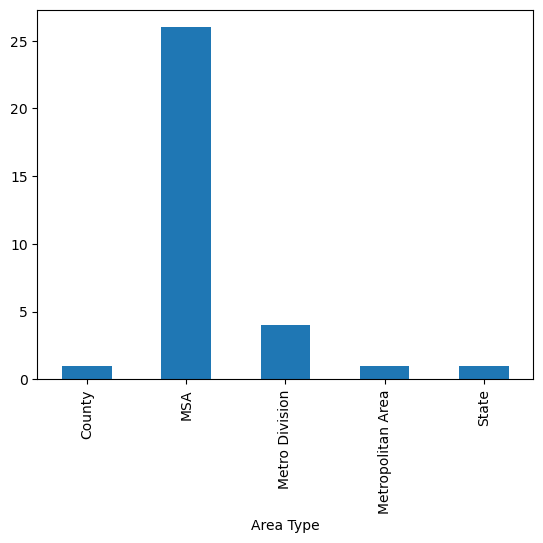

In [16]:
# MSA means Metropolitan Statistical Areas
# https://www.bls.gov/lau/lauov.htm#:~:text=The%20Local%20Area%20Unemployment%20Statistics,England%20City%20and%20Town%20Areas)

# We can see that we have 34 unique years for MSA data
# Meaning that the last year for data collection is 2009
# let's look at the MSAs with the most unemployment in California for the years 1976-2009

seasonally_adjusted_df.groupby('Area Type')['Area Name'].nunique().plot(kind='bar')